# GenZ Slang Evolution Tracker: Complete EDA
### "When does 'bussin' stop bussin?" - Analyzing the lifecycle of internet slang (2020-2025)

This notebook explores the fascinating world of GenZ slang evolution, tracking how terms emerge, spread across platforms, peak in popularity, and eventually fade into obscurity.

## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for beautiful visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/genz-slang-evolution-tracker-2020-2025/genz_slang_usage_2020_2025.csv')

# Parse timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['year_month'] = df['timestamp'].dt.to_period('M')

print("GenZ Slang Evolution Tracker Dataset")
print("=" * 50)
print(f"Total Records: {len(df):,}")
print(f"Date Range: {df['timestamp'].min().date()} to {df['timestamp'].max().date()}")
print(f"Unique Slang Terms: {df['slang_term'].nunique()}")
print(f"Unique Users: {df['user_id'].nunique():,}")
print(f"Columns: {len(df.columns)}")

GenZ Slang Evolution Tracker Dataset
Total Records: 535,396
Date Range: 2020-01-01 to 2025-12-31
Unique Slang Terms: 46
Unique Users: 328,571
Columns: 25


## 2. Dataset Overview

In [3]:
# Quick look at the data
df.head(10)

,record_id,timestamp,slang_term,term_category,term_meaning,origin_platform,usage_platform,region,user_id,user_age_group,...,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence,year,month,year_month
0,0,2020-01-01 01:23:17,simp,insult,someone overly devoted to another person,Reddit,Twitter,California,user_019223,25-30,...,False,18,2,5,0.004,False,153,2020,1,2020-01
1,1,2020-01-01 03:21:59,simp,insult,someone overly devoted to another person,Reddit,Twitter,Texas,user_497341,13-17,...,False,24,1,2,0.004,False,153,2020,1,2020-01
2,2,2020-01-01 05:31:01,vibe check,social,checking someone's mood/energy,TikTok,TikTok,Canada,user_323563,31-40,...,False,121,1,0,0.013,False,92,2020,1,2020-01
3,3,2020-01-01 05:35:30,no cap,emphasis,"no lie, for real",Twitter,Twitter,Arizona,user_244857,18-24,...,False,47,2,1,0.006,False,214,2020,1,2020-01
4,4,2020-01-01 06:39:57,no cap,emphasis,"no lie, for real",Twitter,Instagram,Arizona,user_421848,13-17,...,False,18,0,14,0.006,False,214,2020,1,2020-01
5,5,2020-01-01 06:51:27,vibe check,social,checking someone's mood/energy,TikTok,TikTok,Germany,user_456630,18-24,...,True,144,1,8,0.017,False,92,2020,1,2020-01
6,6,2020-01-01 06:54:44,vibe check,social,checking someone's mood/energy,TikTok,Instagram,Michigan,user_400259,13-17,...,False,149,2,5,0.017,False,92,2020,1,2020-01
7,7,2020-01-01 07:13:32,hits different,emotion,affects you in a unique way,Twitter,Twitter,Texas,user_198862,25-30,...,True,2,0,5,0.002,False,61,2020,1,2020-01
8,8,2020-01-01 07:18:31,bussin,approval,"really good, especially food",TikTok,YouTube,California,user_044389,18-24,...,False,18,0,0,0.002,False,0,2020,1,2020-01
9,9,2020-01-01 07:40:01,no cap,emphasis,"no lie, for real",Twitter,Twitter,New York,user_233854,31-40,...,False,3,1,2,0.001,False,214,2020,1,2020-01


In [4]:
# Column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535396 entries, 0 to 535395
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   record_id             535396 non-null  int64         
 1   timestamp             535396 non-null  datetime64[ns]
 2   slang_term            535396 non-null  object        
 3   term_category         535396 non-null  object        
 4   term_meaning          535396 non-null  object        
 5   origin_platform       535396 non-null  object        
 6   usage_platform        535396 non-null  object        
 7   region                535396 non-null  object        
 8   user_id               535396 non-null  object        
 9   user_age_group        535396 non-null  object        
 10  usage_context         535396 non-null  object        
 11  lifecycle_phase       535396 non-null  object        
 12  intensity_score       535396 non-null  float64       
 13 

In [5]:
# Numerical columns summary
df.describe()

,record_id,timestamp,intensity_score,sentiment_score,likes,shares,comments,virality_score,days_since_emergence,year,month
count,535396.000000,535396,535396.000000,535396.000000,535396.000000,535396.000000,535396.000000,535396.000000,535396.000000,535396.000000,535396.000000
mean,267697.500000,2023-02-15 18:27:32.009215744,0.656799,0.175213,61.483362,3.298273,7.009772,0.009765,474.526909,2022.619993,6.575673
min,0.000000,2020-01-01 01:23:17,0.090000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000
25%,133848.750000,2021-11-24 15:32:47,0.505000,-0.212000,9.000000,0.000000,1.000000,0.003000,261.000000,2021.000000,4.000000
50%,267697.500000,2023-03-22 15:05:47,0.687000,0.246000,28.000000,1.000000,3.000000,0.006000,446.000000,2023.000000,7.000000
75%,401546.250000,2024-05-17 16:25:32.500000,0.844000,0.633000,71.000000,4.000000,8.000000,0.012000,655.000000,2024.000000,10.000000
max,535395.000000,2025-12-31 23:52:04,1.000000,1.000000,35200.000000,3990.000000,6121.000000,1.000000,1428.000000,2025.000000,12.000000
std,154555.656698,NaN,0.229561,0.542696,227.016926,16.171007,30.638933,0.022437,269.419917,1.514863,3.440239


## 3. Slang Term Analysis
### 3.1 Most Popular Slang Terms

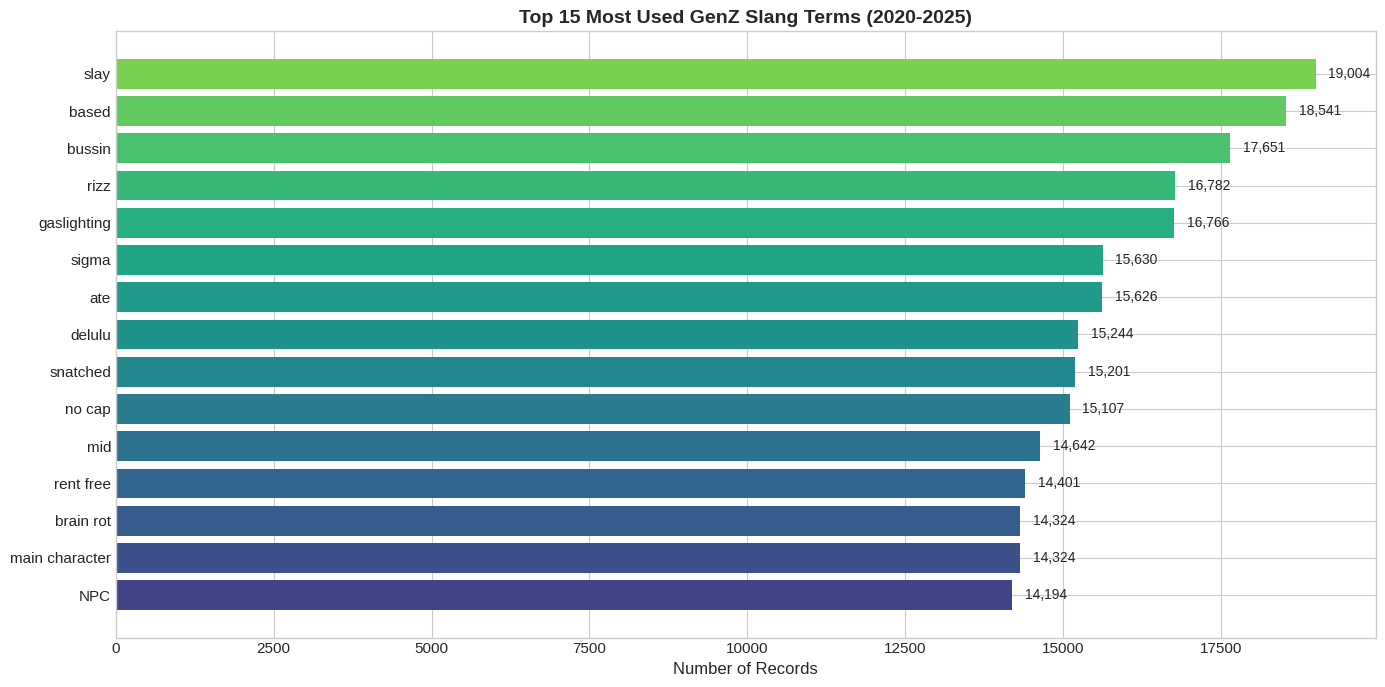

In [6]:
# Top 15 slang terms by usage
top_terms = df['slang_term'].value_counts().head(15)

fig, ax = plt.subplots(figsize=(14, 7))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_terms)))
bars = ax.barh(top_terms.index[::-1], top_terms.values[::-1], color=colors)
ax.set_xlabel('Number of Records', fontsize=12)
ax.set_title('Top 15 Most Used GenZ Slang Terms (2020-2025)', fontsize=14, fontweight='bold')
for bar, val in zip(bars, top_terms.values[::-1]):
    ax.text(val + 200, bar.get_y() + bar.get_height()/2, f'{val:,}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

### 3.2 Slang Terms by Category

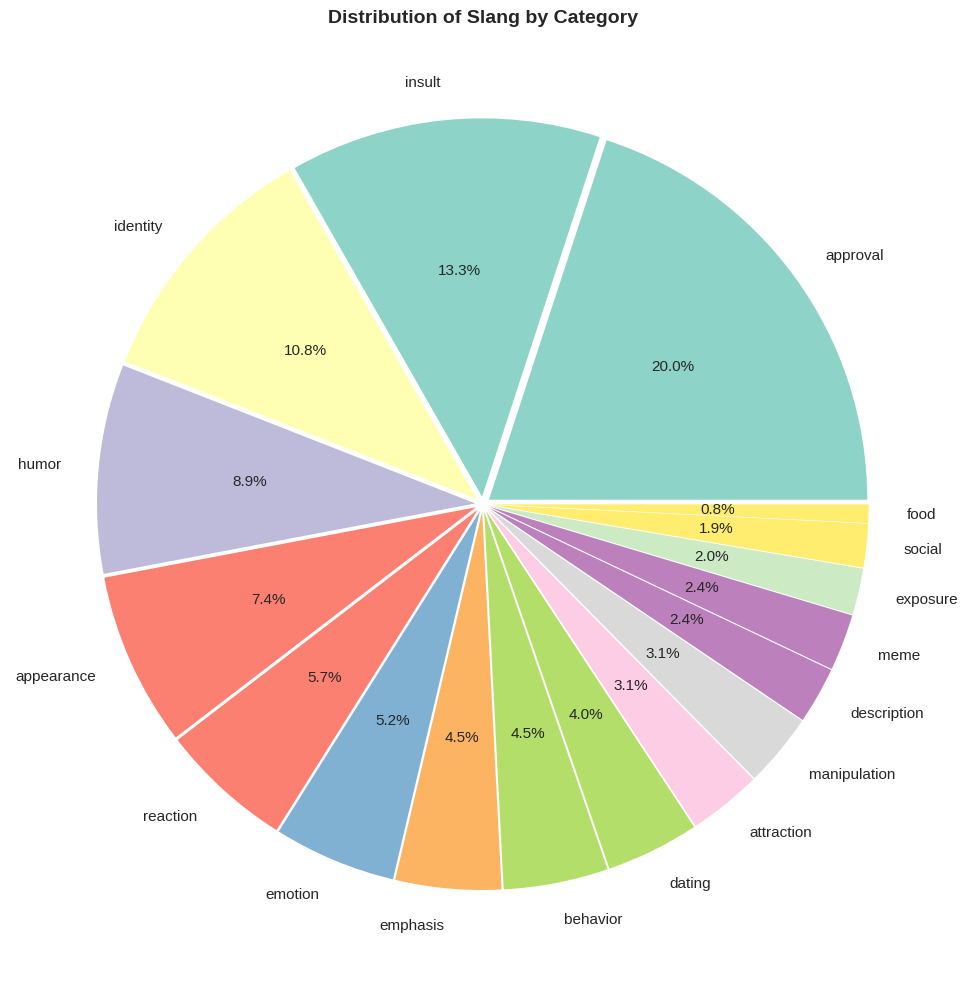


Slang Terms by Category:
term_category
approval        106901
insult           71116
identity         57849
humor            47789
appearance       39797
reaction         30304
emotion          28021
emphasis         24147
behavior         23903
dating           21321
attraction       16782
manipulation     16766
description      12961
meme             12930
exposure         10596
social            9994
food              4219


In [7]:
category_counts = df['term_category'].value_counts()

fig, ax = plt.subplots(figsize=(10, 10))
colors = plt.cm.Set3(np.linspace(0, 1, len(category_counts)))
wedges, texts, autotexts = ax.pie(category_counts.values, labels=category_counts.index, 
                                   autopct='%1.1f%%', colors=colors, explode=[0.02]*len(category_counts))
ax.set_title('Distribution of Slang by Category', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nSlang Terms by Category:")
print(category_counts.to_string())

## 4. Temporal Analysis - The Rise and Fall of Slang
### 4.1 Overall Slang Usage Over Time

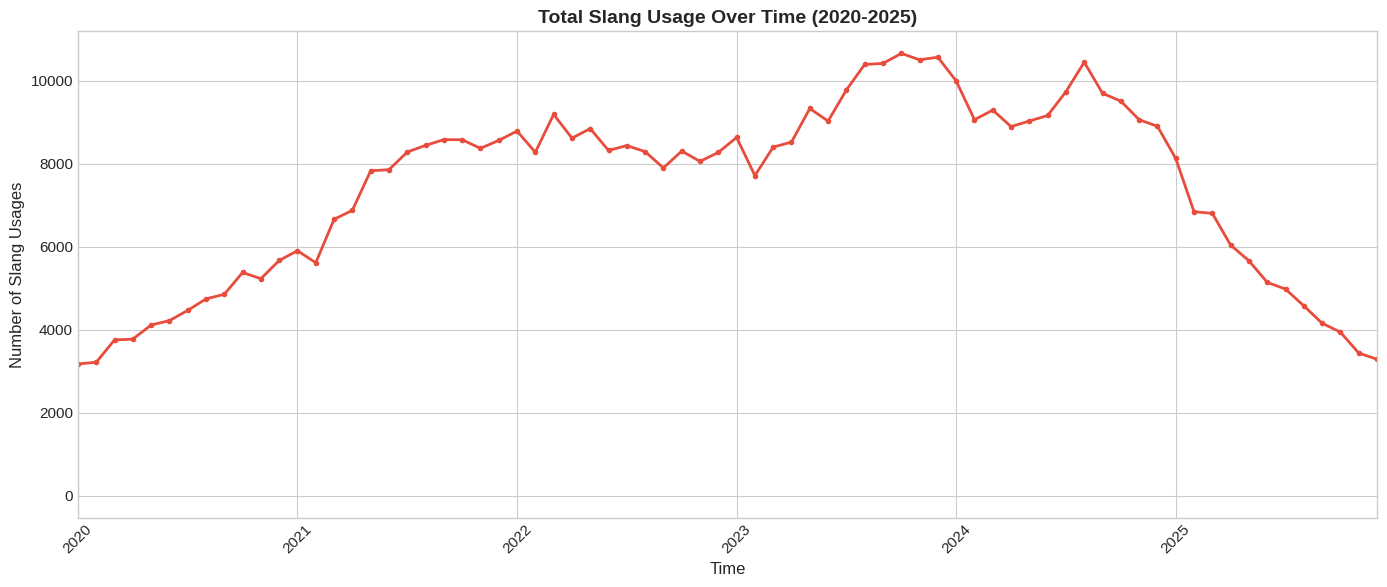

In [8]:
monthly_usage = df.groupby('year_month').size()

fig, ax = plt.subplots(figsize=(14, 6))
monthly_usage.plot(ax=ax, linewidth=2, color='#e74c3c', marker='o', markersize=3)
ax.fill_between(range(len(monthly_usage)), monthly_usage.values, alpha=0.3, color='#e74c3c')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Number of Slang Usages', fontsize=12)
ax.set_title('Total Slang Usage Over Time (2020-2025)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.2 The Lifecycle of Iconic Slang Terms

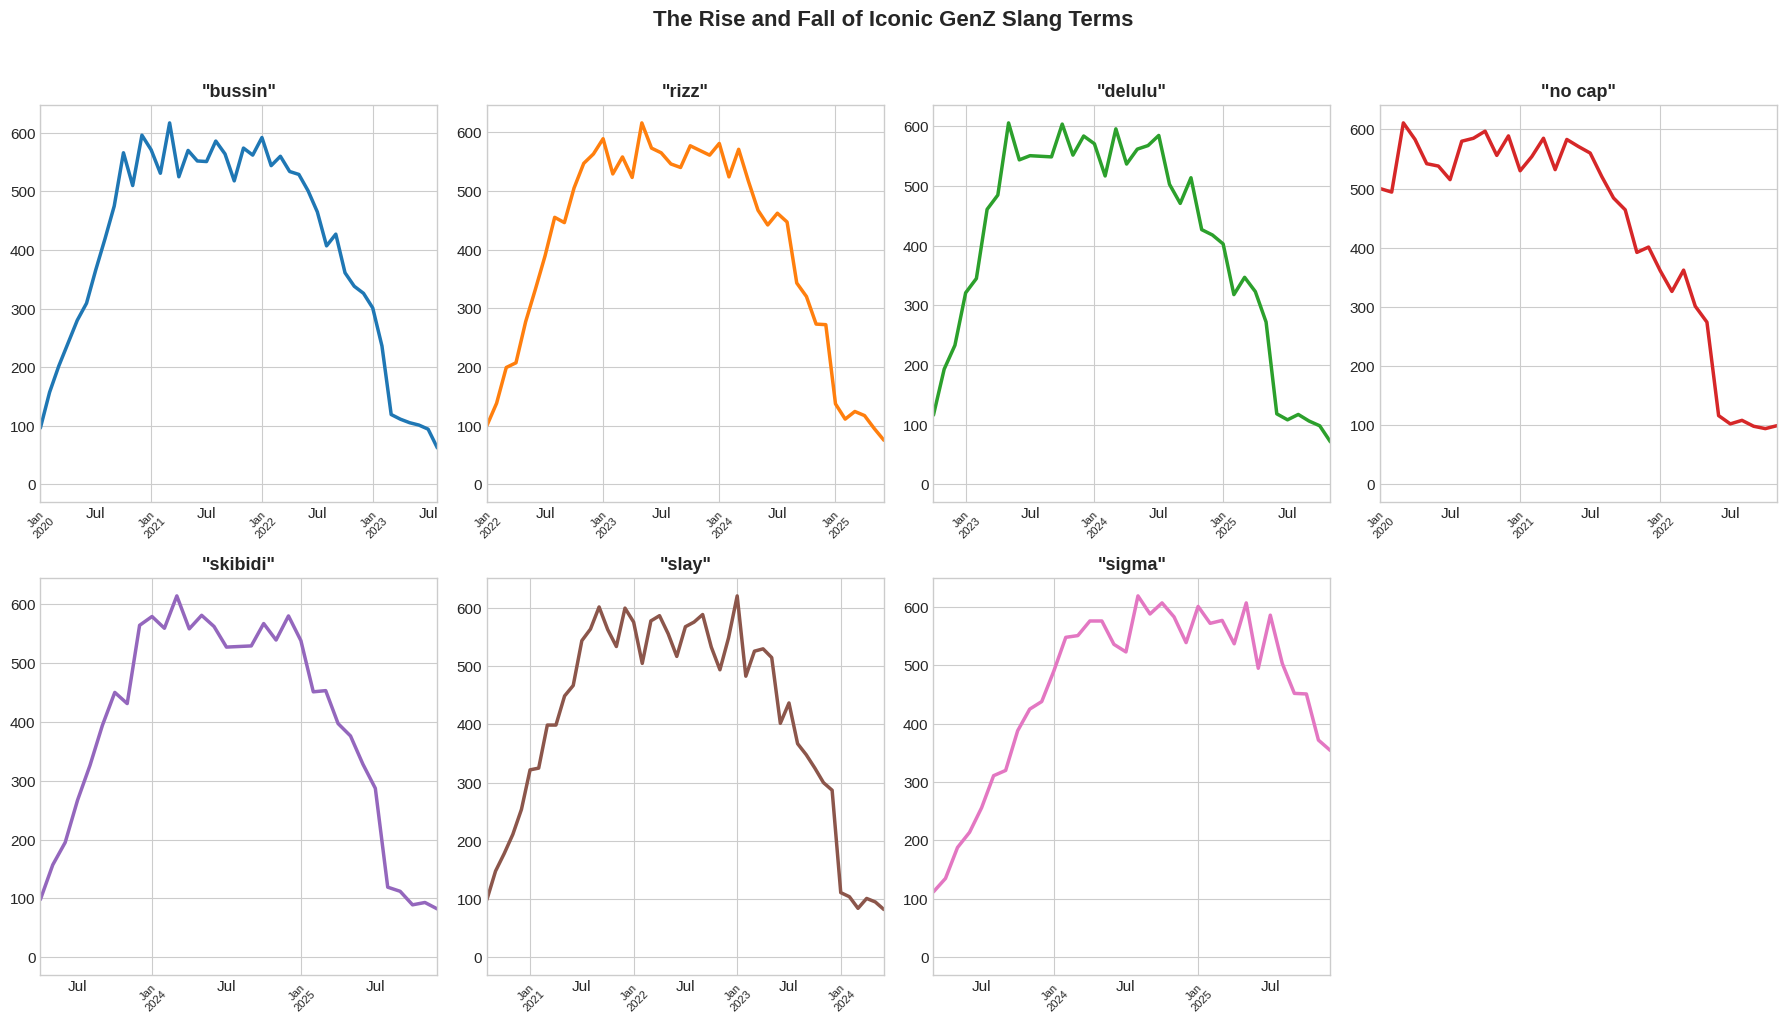

In [9]:
# Select iconic terms to visualize
iconic_terms = ['bussin', 'rizz', 'delulu', 'no cap', 'skibidi', 'slay', 'sigma']

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for idx, term in enumerate(iconic_terms):
    term_data = df[df['slang_term'] == term].groupby('year_month').size()
    
    ax = axes[idx]
    term_data.plot(ax=ax, linewidth=2.5, color=plt.cm.tab10(idx))
    ax.fill_between(range(len(term_data)), term_data.values, alpha=0.3)
    ax.set_title(f'"{term}"', fontsize=13, fontweight='bold')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    
    # Mark peak
    if len(term_data) > 0:
        peak_idx = term_data.idxmax()
        peak_val = term_data.max()
        ax.annotate(f'Peak', xy=(list(term_data.index).index(peak_idx), peak_val),
                   xytext=(5, 10), textcoords='offset points', fontsize=9, color='red')

# Remove empty subplot
axes[-1].axis('off')

plt.suptitle('The Rise and Fall of Iconic GenZ Slang Terms', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 4.3 Lifecycle Phase Distribution

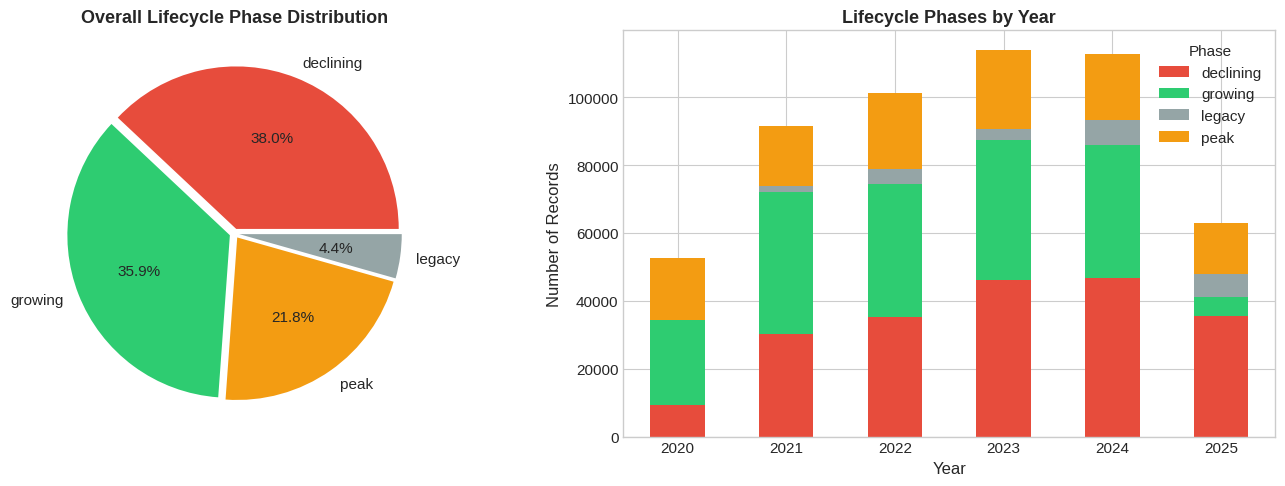

In [10]:
phase_colors = {'growing': '#2ecc71', 'peak': '#f39c12', 'declining': '#e74c3c', 'legacy': '#95a5a6'}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall distribution
phase_counts = df['lifecycle_phase'].value_counts()
axes[0].pie(phase_counts.values, labels=phase_counts.index, autopct='%1.1f%%',
           colors=[phase_colors[p] for p in phase_counts.index], explode=[0.03]*len(phase_counts))
axes[0].set_title('Overall Lifecycle Phase Distribution', fontsize=13, fontweight='bold')

# Phase distribution over time
phase_by_year = df.groupby(['year', 'lifecycle_phase']).size().unstack(fill_value=0)
phase_by_year.plot(kind='bar', stacked=True, ax=axes[1], 
                   color=[phase_colors[p] for p in phase_by_year.columns])
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Number of Records', fontsize=12)
axes[1].set_title('Lifecycle Phases by Year', fontsize=13, fontweight='bold')
axes[1].legend(title='Phase')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 5. Platform Analysis
### 5.1 Platform Distribution

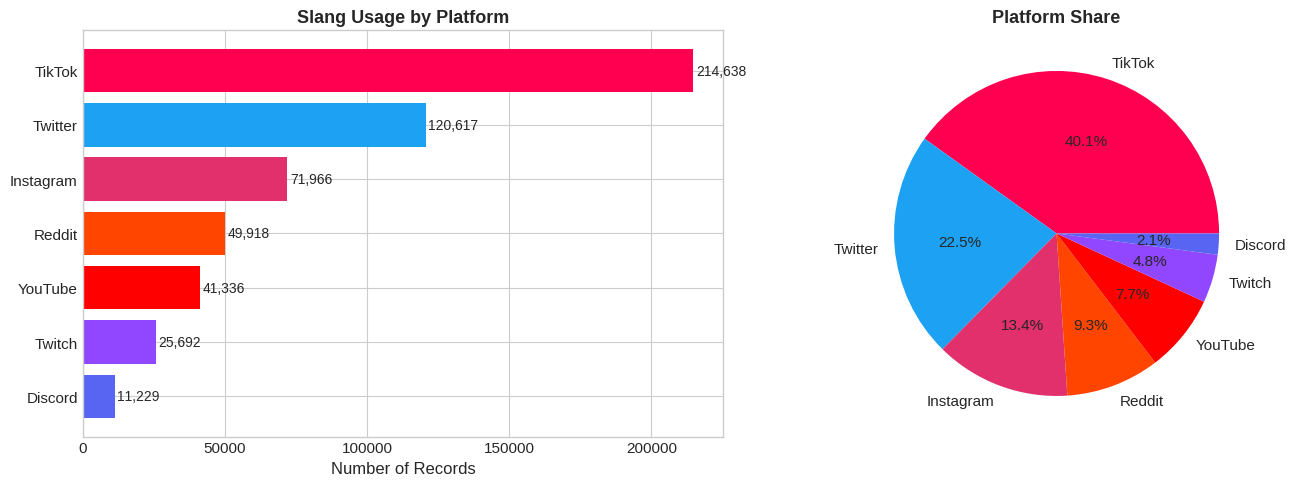

In [11]:
platform_counts = df['usage_platform'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
colors = ['#ff0050', '#1da1f2', '#e1306c', '#ff4500', '#ff0000', '#9146ff', '#5865f2']
axes[0].barh(platform_counts.index[::-1], platform_counts.values[::-1], color=colors[::-1])
axes[0].set_xlabel('Number of Records', fontsize=12)
axes[0].set_title('Slang Usage by Platform', fontsize=13, fontweight='bold')
for i, v in enumerate(platform_counts.values[::-1]):
    axes[0].text(v + 1000, i, f'{v:,}', va='center', fontsize=10)

# Percentage breakdown
axes[1].pie(platform_counts.values, labels=platform_counts.index, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Platform Share', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

### 5.2 Cross-Platform Spread

Cross-Platform Spread Statistics:
Records where term used on different platform than origin: 278,996
Cross-platform rate: 52.1%


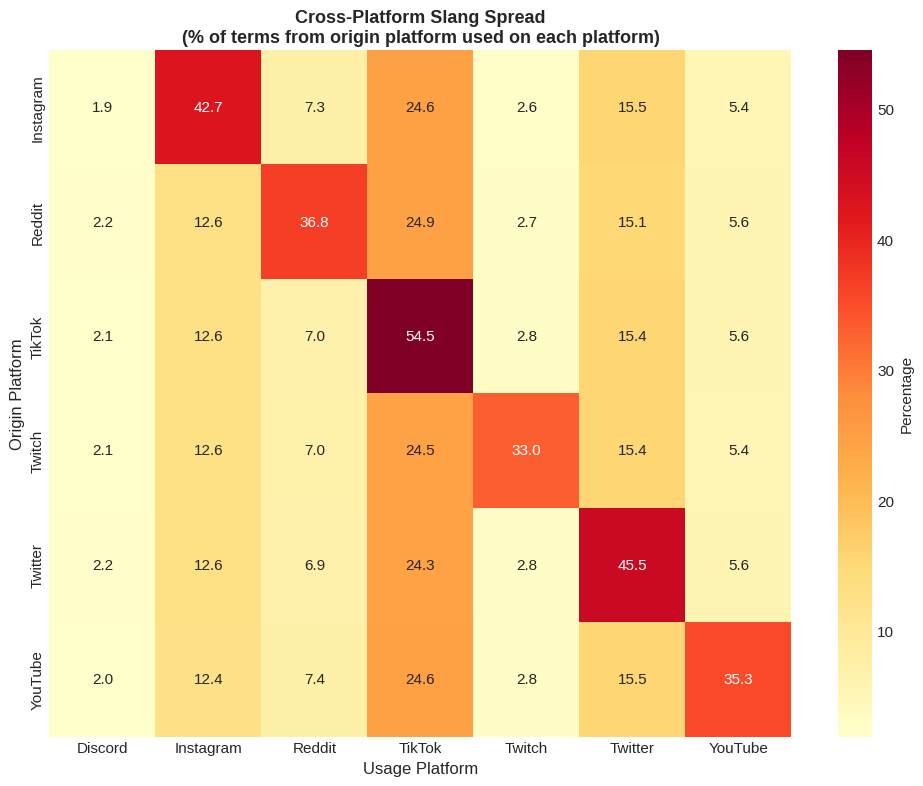

In [12]:
# Compare origin platform vs usage platform
cross_platform = df[df['origin_platform'] != df['usage_platform']]
cross_platform_rate = len(cross_platform) / len(df) * 100

print(f"Cross-Platform Spread Statistics:")
print(f"Records where term used on different platform than origin: {len(cross_platform):,}")
print(f"Cross-platform rate: {cross_platform_rate:.1f}%")

# Heatmap of origin -> usage platform
cross_matrix = pd.crosstab(df['origin_platform'], df['usage_platform'], normalize='index') * 100

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cross_matrix, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Usage Platform', fontsize=12)
ax.set_ylabel('Origin Platform', fontsize=12)
ax.set_title('Cross-Platform Slang Spread\n(% of terms from origin platform used on each platform)', 
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Sentiment Analysis
### 6.1 Overall Sentiment Distribution

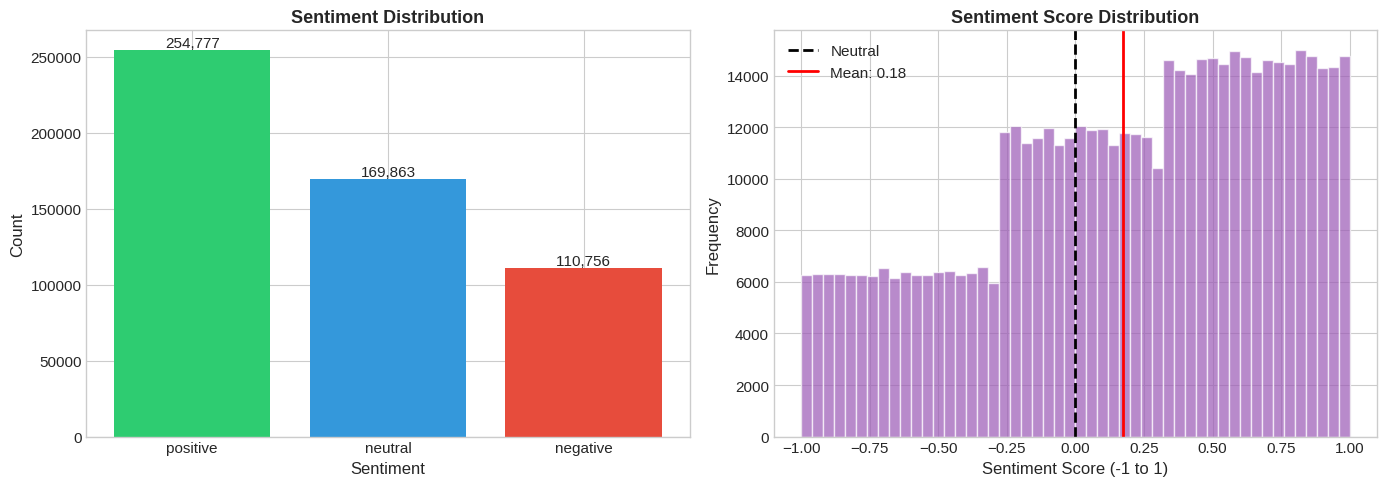

In [13]:
sentiment_counts = df['sentiment'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sentiment categories
colors_sent = {'positive': '#2ecc71', 'neutral': '#3498db', 'negative': '#e74c3c'}
axes[0].bar(sentiment_counts.index, sentiment_counts.values, 
           color=[colors_sent[s] for s in sentiment_counts.index])
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Sentiment Distribution', fontsize=13, fontweight='bold')
for i, v in enumerate(sentiment_counts.values):
    axes[0].text(i, v + 2000, f'{v:,}', ha='center', fontsize=11)

# Sentiment score distribution
axes[1].hist(df['sentiment_score'], bins=50, color='#9b59b6', edgecolor='white', alpha=0.7)
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=2, label='Neutral')
axes[1].axvline(x=df['sentiment_score'].mean(), color='red', linestyle='-', linewidth=2, 
               label=f'Mean: {df["sentiment_score"].mean():.2f}')
axes[1].set_xlabel('Sentiment Score (-1 to 1)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Sentiment Score Distribution', fontsize=13, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

### 6.2 Sentiment by Slang Category

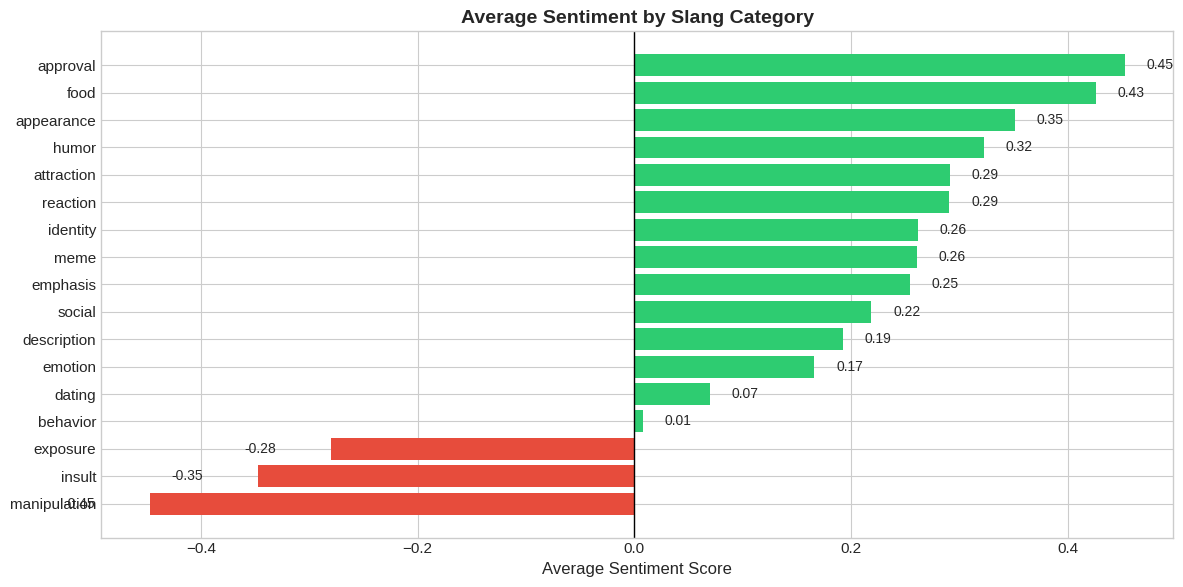

In [14]:
category_sentiment = df.groupby('term_category')['sentiment_score'].mean().sort_values()

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in category_sentiment.values]
bars = ax.barh(category_sentiment.index, category_sentiment.values, color=colors)
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax.set_xlabel('Average Sentiment Score', fontsize=12)
ax.set_title('Average Sentiment by Slang Category', fontsize=14, fontweight='bold')
for bar, val in zip(bars, category_sentiment.values):
    ax.text(val + 0.02 if val >= 0 else val - 0.08, bar.get_y() + bar.get_height()/2, 
           f'{val:.2f}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

## 7. Geographic Analysis

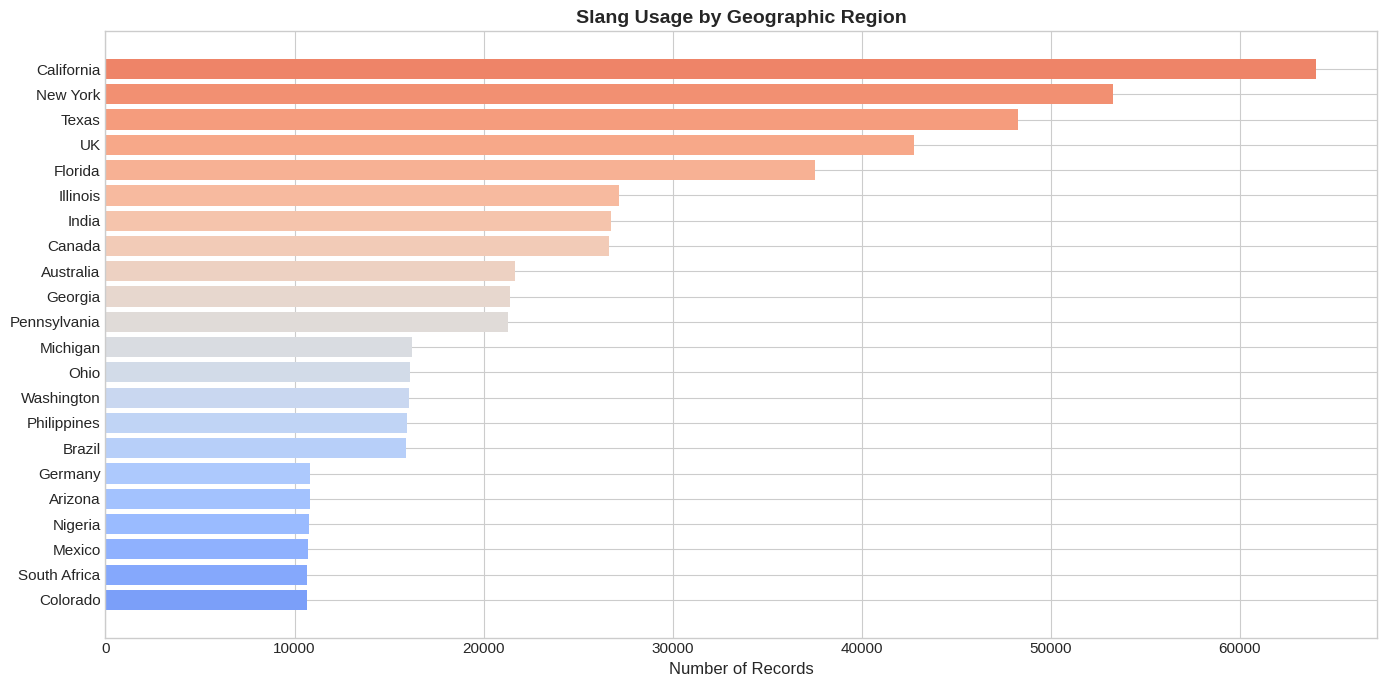


US vs International Usage:
US: 342,831 (64.0%)
International: 192,565 (36.0%)


In [15]:
region_counts = df['region'].value_counts()

fig, ax = plt.subplots(figsize=(14, 7))
colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(region_counts)))
ax.barh(region_counts.index[::-1], region_counts.values[::-1], color=colors)
ax.set_xlabel('Number of Records', fontsize=12)
ax.set_title('Slang Usage by Geographic Region', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# US vs International
us_states = ["California", "New York", "Texas", "Florida", "Illinois", 
             "Georgia", "Pennsylvania", "Ohio", "Michigan", "Washington", "Arizona", "Colorado"]
df['region_type'] = df['region'].apply(lambda x: 'US' if x in us_states else 'International')

region_type_counts = df['region_type'].value_counts()
print(f"\nUS vs International Usage:")
print(f"US: {region_type_counts['US']:,} ({region_type_counts['US']/len(df)*100:.1f}%)")
print(f"International: {region_type_counts['International']:,} ({region_type_counts['International']/len(df)*100:.1f}%)")

## 8. Demographics Analysis
### 8.1 Age Group Distribution

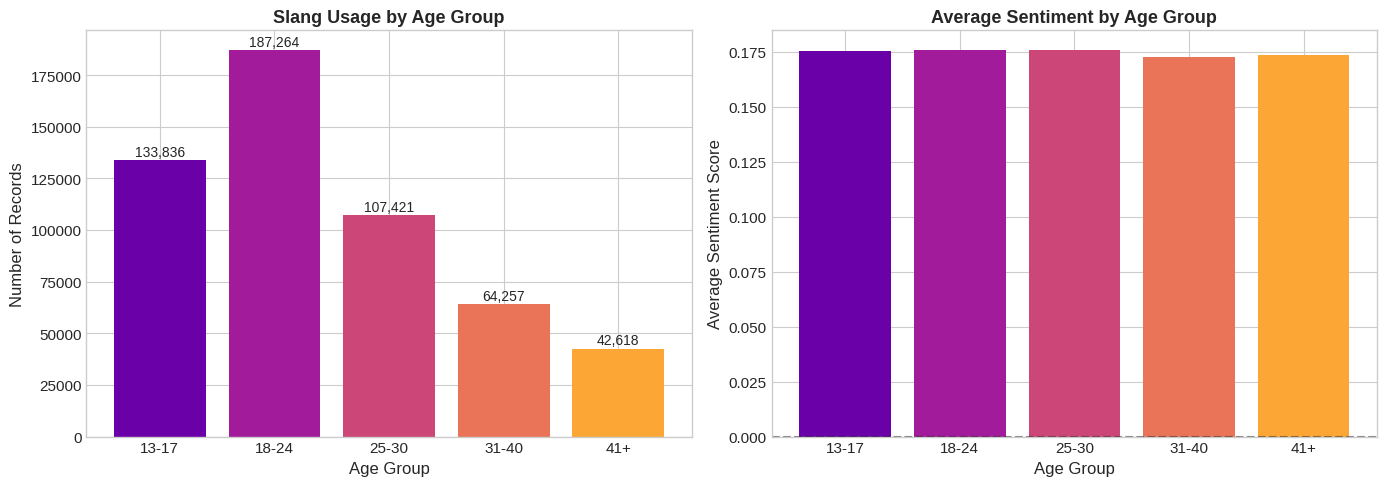

In [16]:
age_counts = df['user_age_group'].value_counts().reindex(['13-17', '18-24', '25-30', '31-40', '41+'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
colors_age = plt.cm.plasma(np.linspace(0.2, 0.8, len(age_counts)))
axes[0].bar(age_counts.index, age_counts.values, color=colors_age)
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Number of Records', fontsize=12)
axes[0].set_title('Slang Usage by Age Group', fontsize=13, fontweight='bold')
for i, v in enumerate(age_counts.values):
    axes[0].text(i, v + 2000, f'{v:,}', ha='center', fontsize=10)

# Age group sentiment comparison
age_sentiment = df.groupby('user_age_group')['sentiment_score'].mean().reindex(['13-17', '18-24', '25-30', '31-40', '41+'])
axes[1].bar(age_sentiment.index, age_sentiment.values, color=colors_age)
axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].set_ylabel('Average Sentiment Score', fontsize=12)
axes[1].set_title('Average Sentiment by Age Group', fontsize=13, fontweight='bold')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### 8.2 Age Group Adoption Patterns

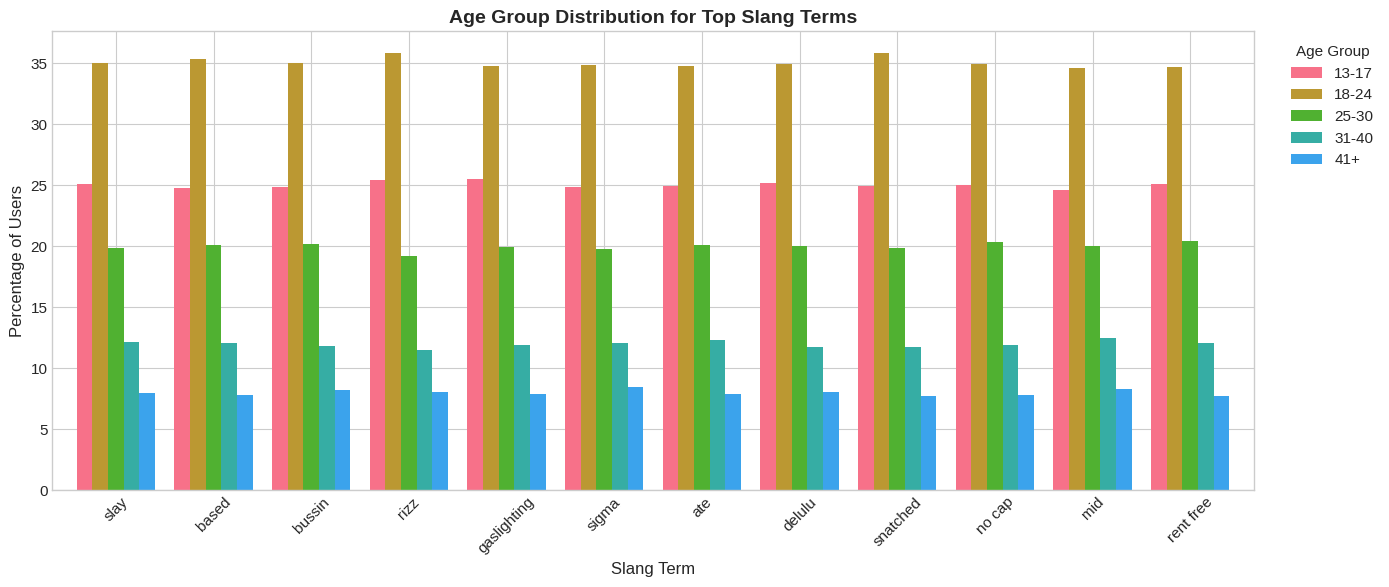

In [17]:
# Which age groups adopt which slang terms?
age_term_matrix = pd.crosstab(df['user_age_group'], df['slang_term'], normalize='columns') * 100
top_terms_list = df['slang_term'].value_counts().head(12).index

fig, ax = plt.subplots(figsize=(14, 6))
age_term_matrix_top = age_term_matrix[top_terms_list].reindex(['13-17', '18-24', '25-30', '31-40', '41+'])
age_term_matrix_top.T.plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Slang Term', fontsize=12)
ax.set_ylabel('Percentage of Users', fontsize=12)
ax.set_title('Age Group Distribution for Top Slang Terms', fontsize=14, fontweight='bold')
ax.legend(title='Age Group', bbox_to_anchor=(1.02, 1))
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 9. Engagement Analysis
### 9.1 Engagement Metrics Overview

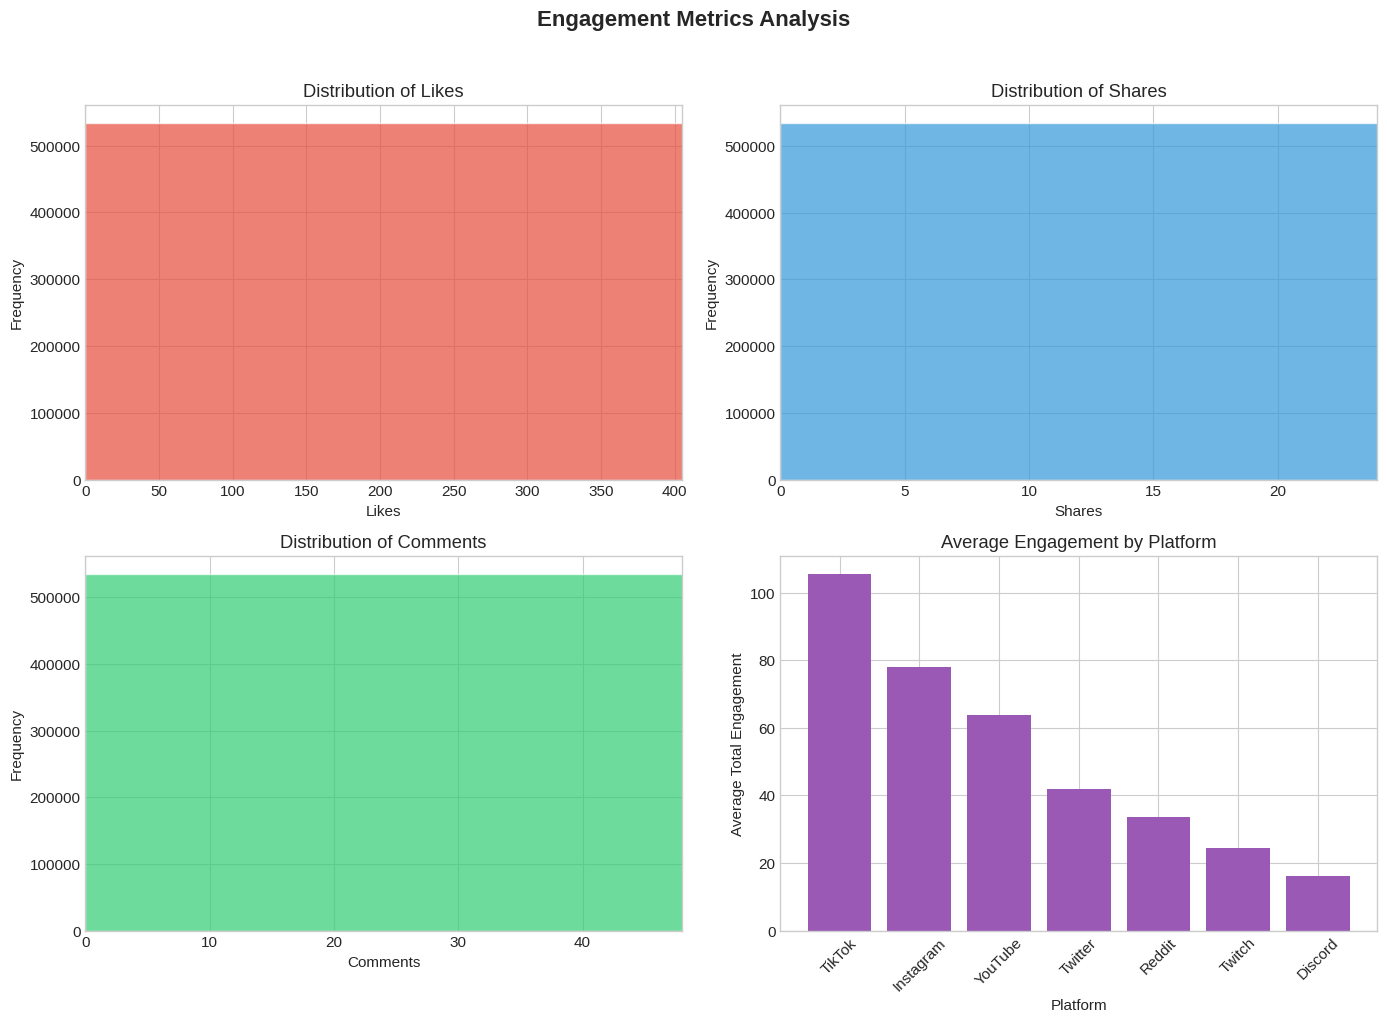

In [18]:
df['total_engagement'] = df['likes'] + df['shares'] + df['comments']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Likes distribution
axes[0, 0].hist(df['likes'], bins=50, color='#e74c3c', edgecolor='white', alpha=0.7)
axes[0, 0].set_xlabel('Likes')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Likes')
axes[0, 0].set_xlim(0, df['likes'].quantile(0.99))

# Shares distribution
axes[0, 1].hist(df['shares'], bins=50, color='#3498db', edgecolor='white', alpha=0.7)
axes[0, 1].set_xlabel('Shares')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Shares')
axes[0, 1].set_xlim(0, df['shares'].quantile(0.99))

# Comments distribution
axes[1, 0].hist(df['comments'], bins=50, color='#2ecc71', edgecolor='white', alpha=0.7)
axes[1, 0].set_xlabel('Comments')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Comments')
axes[1, 0].set_xlim(0, df['comments'].quantile(0.99))

# Engagement by platform
platform_engagement = df.groupby('usage_platform')['total_engagement'].mean().sort_values(ascending=False)
axes[1, 1].bar(platform_engagement.index, platform_engagement.values, color='#9b59b6')
axes[1, 1].set_xlabel('Platform')
axes[1, 1].set_ylabel('Average Total Engagement')
axes[1, 1].set_title('Average Engagement by Platform')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Engagement Metrics Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 9.2 Viral Content Analysis

Viral Content Statistics:
Viral posts: 717 (0.13%)

Average Engagement - Viral vs Non-Viral:
           likes  shares  comments  total_engagement
is_viral                                            
False       57.2     3.0       6.5              66.6
True      3283.1   217.8     422.0            3922.8


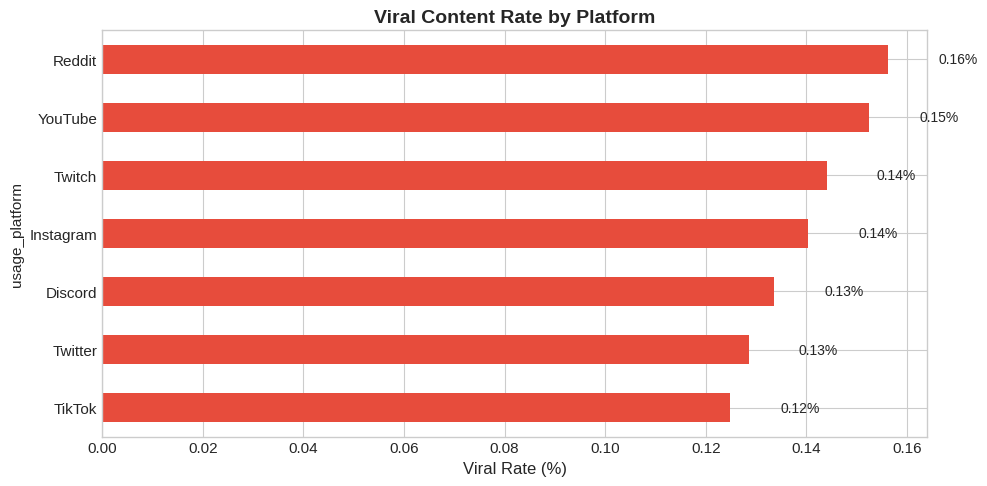

In [19]:
viral_rate = df['is_viral'].mean() * 100
print(f"Viral Content Statistics:")
print(f"Viral posts: {df['is_viral'].sum():,} ({viral_rate:.2f}%)")

# Viral vs non-viral engagement comparison
viral_comparison = df.groupby('is_viral')[['likes', 'shares', 'comments', 'total_engagement']].mean()
print("\nAverage Engagement - Viral vs Non-Viral:")
print(viral_comparison.round(1))

# Viral content by platform
viral_by_platform = df.groupby('usage_platform')['is_viral'].mean() * 100

fig, ax = plt.subplots(figsize=(10, 5))
viral_by_platform.sort_values().plot(kind='barh', ax=ax, color='#e74c3c')
ax.set_xlabel('Viral Rate (%)', fontsize=12)
ax.set_title('Viral Content Rate by Platform', fontsize=14, fontweight='bold')
for i, v in enumerate(viral_by_platform.sort_values().values):
    ax.text(v + 0.01, i, f'{v:.2f}%', va='center', fontsize=10)
plt.tight_layout()
plt.show()

## 10. Ironic Usage Analysis

Ironic Usage Statistics:
Ironic usage rate: 10.90%


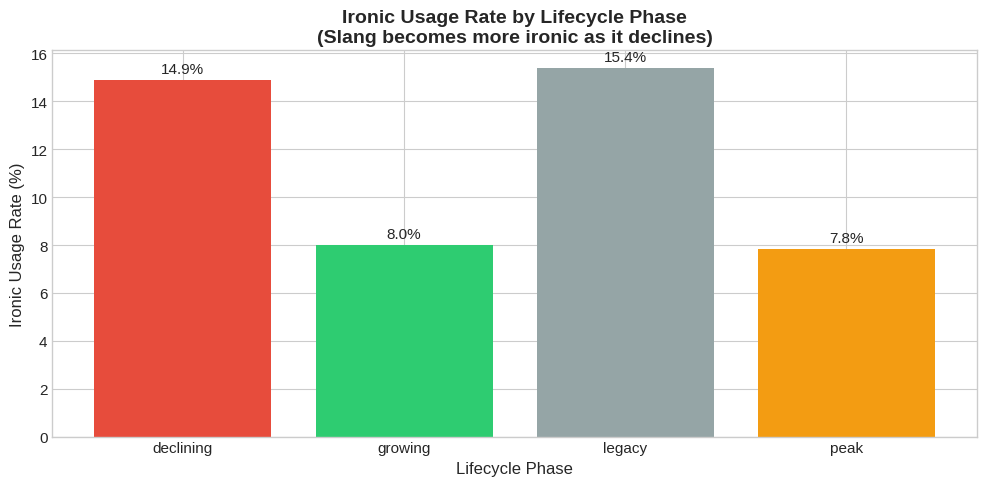

In [20]:
ironic_rate = df['ironic_usage'].mean() * 100
print(f"Ironic Usage Statistics:")
print(f"Ironic usage rate: {ironic_rate:.2f}%")

# Ironic usage by lifecycle phase
phase_colors = {'growing': '#2ecc71', 'peak': '#f39c12', 'declining': '#e74c3c', 'legacy': '#95a5a6'}
ironic_by_phase = df.groupby('lifecycle_phase')['ironic_usage'].mean() * 100

fig, ax = plt.subplots(figsize=(10, 5))
colors_phase = [phase_colors[p] for p in ironic_by_phase.index]
ax.bar(ironic_by_phase.index, ironic_by_phase.values, color=colors_phase)
ax.set_xlabel('Lifecycle Phase', fontsize=12)
ax.set_ylabel('Ironic Usage Rate (%)', fontsize=12)
ax.set_title('Ironic Usage Rate by Lifecycle Phase\n(Slang becomes more ironic as it declines)', 
             fontsize=14, fontweight='bold')
for i, v in enumerate(ironic_by_phase.values):
    ax.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

## 11. Intensity Score Analysis

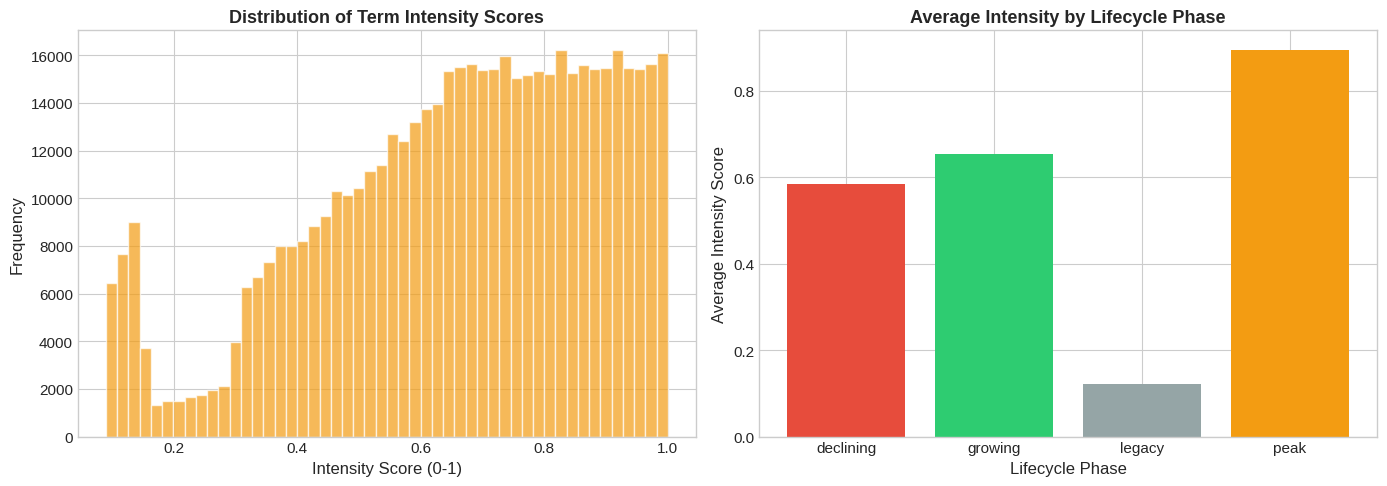

In [21]:
# Intensity score represents how "active" a term is at any given time
phase_colors = {'growing': '#2ecc71', 'peak': '#f39c12', 'declining': '#e74c3c', 'legacy': '#95a5a6'}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of intensity scores
axes[0].hist(df['intensity_score'], bins=50, color='#f39c12', edgecolor='white', alpha=0.7)
axes[0].set_xlabel('Intensity Score (0-1)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Term Intensity Scores', fontsize=13, fontweight='bold')

# Intensity by lifecycle phase
intensity_by_phase = df.groupby('lifecycle_phase')['intensity_score'].mean()
axes[1].bar(intensity_by_phase.index, intensity_by_phase.values, 
           color=[phase_colors[p] for p in intensity_by_phase.index])
axes[1].set_xlabel('Lifecycle Phase', fontsize=12)
axes[1].set_ylabel('Average Intensity Score', fontsize=12)
axes[1].set_title('Average Intensity by Lifecycle Phase', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

## 12. Key Insights Summary

In [22]:
print("=" * 60)
print("KEY INSIGHTS FROM THE GENZ SLANG EVOLUTION TRACKER")
print("=" * 60)

# Calculate and display key insights
cross_platform = df[df['origin_platform'] != df['usage_platform']]
cross_platform_rate = len(cross_platform) / len(df) * 100

most_popular_term = df['slang_term'].value_counts().idxmax()
top_platform = df['usage_platform'].value_counts().idxmax()
top_region = df['region'].value_counts().idxmax()
dominant_age = df['user_age_group'].value_counts().idxmax()
most_positive_category = df.groupby('term_category')['sentiment_score'].mean().idxmax()
most_negative_category = df.groupby('term_category')['sentiment_score'].mean().idxmin()

print(f"""
1. POPULARITY
   - Most used slang term: \"{most_popular_term}\"
   - Dominant platform: {top_platform} ({df['usage_platform'].value_counts()[top_platform]/len(df)*100:.1f}% of usage)

2. DEMOGRAPHICS  
   - Primary age group: {dominant_age} ({df['user_age_group'].value_counts()[dominant_age]/len(df)*100:.1f}% of users)
   - Top geographic region: {top_region}

3. SENTIMENT
   - Overall sentiment skew: {"Positive" if df['sentiment_score'].mean() > 0 else "Negative"} (avg: {df['sentiment_score'].mean():.3f})
   - Most positive category: {most_positive_category}
   - Most negative category: {most_negative_category}

4. VIRALITY
   - Viral content rate: {df['is_viral'].mean()*100:.2f}%
   - Avg engagement (viral): {df[df['is_viral']]['total_engagement'].mean():.0f} interactions
   - Avg engagement (non-viral): {df[~df['is_viral']]['total_engagement'].mean():.0f} interactions

5. LIFECYCLE
   - Growing phase: {(df['lifecycle_phase']=='growing').mean()*100:.1f}%
   - Peak phase: {(df['lifecycle_phase']=='peak').mean()*100:.1f}%
   - Declining phase: {(df['lifecycle_phase']=='declining').mean()*100:.1f}%
   - Legacy phase: {(df['lifecycle_phase']=='legacy').mean()*100:.1f}%

6. CROSS-PLATFORM SPREAD
   - {cross_platform_rate:.1f}% of slang usage occurs on platforms different from origin
   - TikTok-originated terms spread fastest to other platforms
""")

print("\nThank you for exploring the GenZ Slang Evolution Tracker!")
print("Happy analyzing! No cap, this dataset is bussin!")

KEY INSIGHTS FROM THE GENZ SLANG EVOLUTION TRACKER

1. POPULARITY
   - Most used slang term: "slay"
   - Dominant platform: TikTok (40.1% of usage)

2. DEMOGRAPHICS  
   - Primary age group: 18-24 (35.0% of users)
   - Top geographic region: California

3. SENTIMENT
   - Overall sentiment skew: Positive (avg: 0.175)
   - Most positive category: approval
   - Most negative category: manipulation

4. VIRALITY
   - Viral content rate: 0.13%
   - Avg engagement (viral): 3923 interactions
   - Avg engagement (non-viral): 67 interactions

5. LIFECYCLE
   - Growing phase: 35.9%
   - Peak phase: 21.8%
   - Declining phase: 38.0%
   - Legacy phase: 4.4%

6. CROSS-PLATFORM SPREAD
   - 52.1% of slang usage occurs on platforms different from origin
   - TikTok-originated terms spread fastest to other platforms


Thank you for exploring the GenZ Slang Evolution Tracker!
Happy analyzing! No cap, this dataset is bussin!
